In [1]:
import numpy as np
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data():#load data of the image
    img = imread('im.jpg')
    return img

In [3]:
data = load_data()
print(data.shape)

(690, 550, 3)


In [4]:
def image_plot(data):#plot the image
    plt.imshow( data.reshape(690,550,3) ) 
    plt.show()

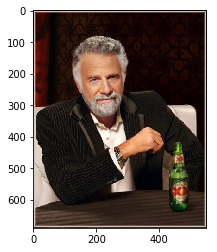

In [5]:
image_plot(data)

In [6]:
data = np.reshape(data,(data.shape[0]*data.shape[1],data.shape[2])) #reshape to (690x550)x3=379500x3
data = data.astype(float)/255 #make the data values between [0,1]

In [7]:
N, D = data.shape #N=(690x550)=379500, D=3 (r, g, b)
K = 4 #K for EM

#Initialize P=(Kx1), M=(KxD), S=(Kx1)
Pinit = np.full((K, 1), 1/K)
Minit = (np.array( [np.mean(data, axis=0),]*K ) + np.random.randn( K, D ))%1
Sinit = np.array (np.random.randn( K, 1 )%1)

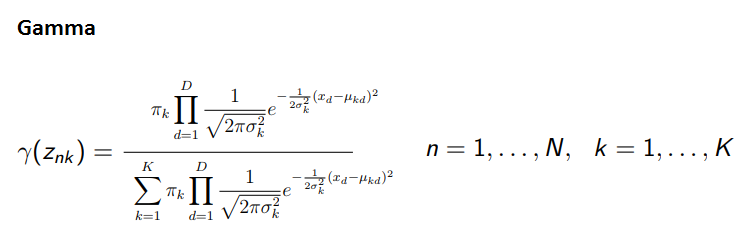

In [8]:
def numer(P,M,S,k_num):
    
    numer = np.zeros((N,1))
    for n in range (N):     
        mult = 1
        for d in range(D):
            mult *= (np.exp((-np.square(data[n,d]-M[k_num,d]))/(2*S[k_num,0])))/((2*P[k_num,0]*S[k_num,0])**0.5)
        numer[n,0] = P[k_num,0]*mult
         
    return numer


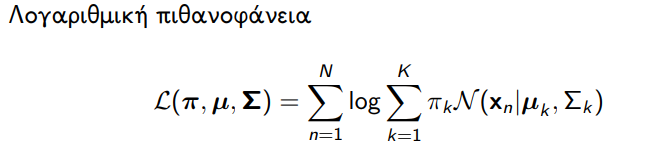

In [9]:
def expectation(P,M,S):
    
    gamma = np.zeros((N,K))
    for k in range(K):
        gamma[:,k]=numer(P, M, S, k)[:,0]

    L = 0 # L for loss
    for n in range(N):
        
        denum = np.sum(gamma[n,:]) #denumerator
        L += np.log(denum)
        
        for k in range(K):
            gamma[n,k] /= denum
            
    return gamma,L

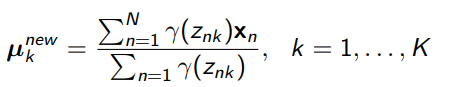

In [10]:
def M_new(gamma):
    
    M = np.zeros((K,D))
    for k in range (K):
        sum1 = 0
        sum2 = np.sum(gamma[:,k])
        for d in range(D):     
            sum1 = np.sum(np.multiply(gamma[:,k],data[:,d]))                            
            M[k,d] = sum1/sum2
        
    return M

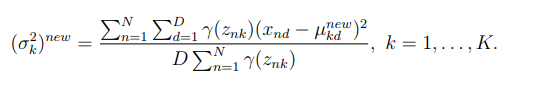

In [11]:
def S_new(gamma, M):
    
    S = np.zeros((K,1))
    for k in range (K):
        sum1 = 0
        for n in range (N):
            sum1 += gamma[n,k]*(np.sum(np.square(np.subtract(data[n,:],M[k,:]))))             
        S[k,0] = sum1/(D*np.sum(gamma[:,k]))
        
    return S

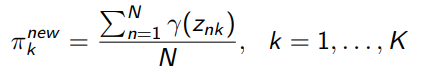

In [12]:
def P_new(gamma):
    
    P = np.zeros((K,1))
    for k in range (K):
        P[k,0] = np.sum(gamma[:,k])/N                             
    return P

In [13]:
def plot_costs(costs):
    x = range( 1, len(costs)+1 )
    y = costs
    plt.plot( x, y )
    plt.ylabel( 'cost' )
    plt.xlabel( 'iterations' )
    plt.title( "Cost Function =" )
    plt.xticks( x )
    plt.show()

In [14]:
def expectation_maximization(Pold, Mold, Sold):
    
    P = Pold
    M = Mold
    S = Sold
    
    tol = 1e-6 #tolerance of convergence
    Jold = np.NINF
    maxIters = 10 #number of iterations
    costs = []
    for it in range(maxIters):

        J = 0 #total cost
    
        #Expectation
        gamma,L = expectation(P,M,S)
        J += L
        
        #Mazimization
        M = M_new(gamma)
        S = S_new(gamma,M)
        P = P_new(gamma)

        for n in range(N):
            image_new[n,:] = M[np.argmax(gamma[n,:]),:] #find the category where belongs
    
        image_plot(image_new)
        
        #Check for convergence
        costs.append(J)
        print("Iteration #{}, Cost function value: {}".format(it+1, J))
        if np.abs(J - Jold) < tol:
            break
        Jold = J
    
    
    plot_costs(costs)
    
    return P,M,S

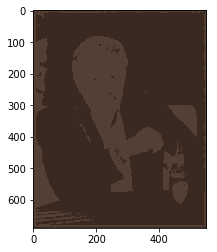

Iteration #1, Cost function value: 397515.73916527437


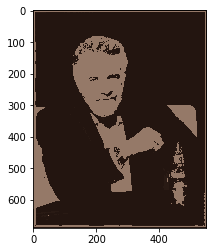

Iteration #2, Cost function value: 1581549.9563093665


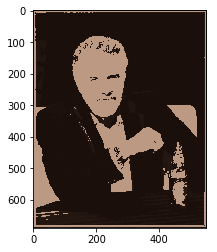

Iteration #3, Cost function value: 2219283.989919763


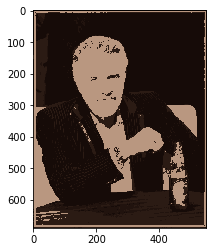

Iteration #4, Cost function value: 2524773.5317624183


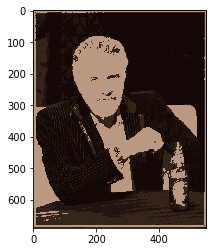

Iteration #5, Cost function value: 2661603.2530782595


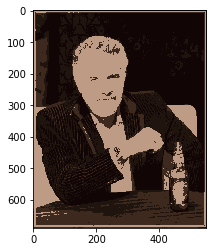

Iteration #6, Cost function value: 2786291.9681887333


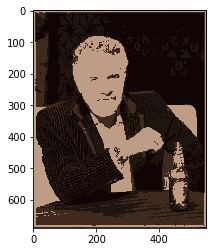

Iteration #7, Cost function value: 2862343.174581178


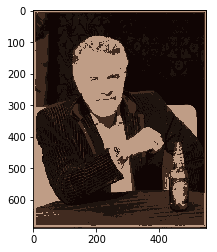

Iteration #8, Cost function value: 2885964.1065705987


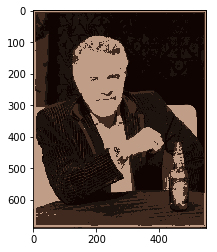

Iteration #9, Cost function value: 2890508.7921399684


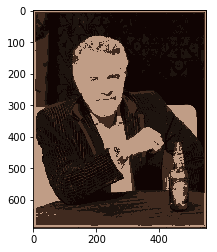

Iteration #10, Cost function value: 2892321.0896989736


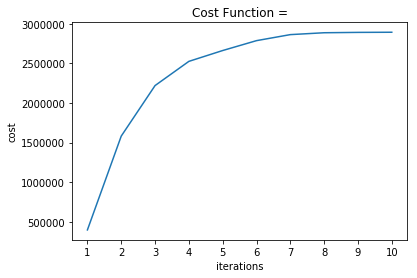

In [15]:
image_new = np.zeros((N,D))
P,M,S = expectation_maximization (Pinit, Minit, Sinit)

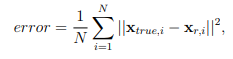

In [16]:
def Error(data,image_new):#calculate Error
    error = (1/N)*np.sum(np.square(data-image_new))
    print (error)

In [17]:
Error(data,image_new)

0.021612784960657286


# Result For 10 Iters, K=1

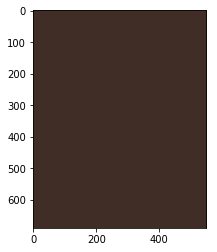 Cost: 450855.9836808653 Error: 0.17473886870077282

# Result For 10 Iters, K=2

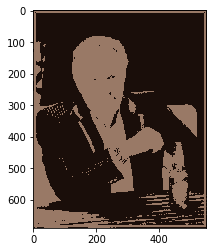  Cost: 2076253.743887684 Error: 0.057334848237804305

# Result For 10 Iters, K=4

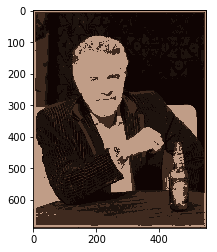  Cost: 2893650.3431421216 Error: 0.02155373815442094

# Result For 10 Iters, K=8

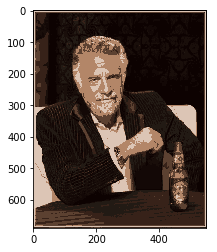  Cost: 3431040.1060098214 Error: 0.007836653721910456

# Result For 10 Iters, K=16

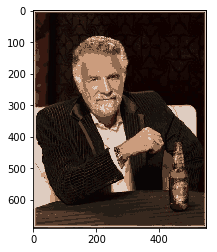  Cost: 3929600.123241404 Error: 0.005607873559125565

# Result For 10 Iters, K=32

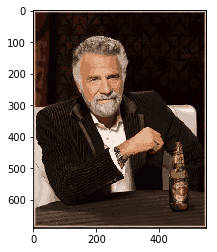  Cost: 4391801.379372032 Error: 0.002672806485376979

# Result For 5 Iters, K=64

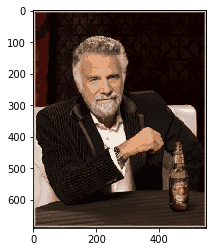  Cost: 4808076.685760714 Error: 0.002414557365774978